# Create dataset
We start considering the Macrozone NORD

In [92]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

# Add the source directory to the system path
sys.path.append(os.path.abspath('../src'))
from open_data import fetch_db_table_sqlserver16
import utils
import importlib

# Reload the module
importlib.reload(utils)

# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_SEGNO_QH" 
qh = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
qh = qh.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
qh = qh[['MACROZONA', 'ORAINI', 'SBIL_MWH']]
# Convert ORAINI to datetime using the correct method
qh['ORAINI'] = pd.to_datetime(qh['ORAINI'], format='%Y%m%d%H%M')
qh.set_index('ORAINI', inplace=True)
# Nord
qh_nord = qh[qh['MACROZONA'] == 'NORD']
qh_nord = qh_nord.drop(columns = ['MACROZONA'])

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


In [93]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_ENERGY_BALANCE" 
power = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
power = power.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
power = power[['ENERGY_BALANCE_GWh', 'ORAINI', 'ENERGY_SOURCE']]
# Convert ORAINI to datetime using the correct method
power['ORAINI'] = pd.to_datetime(power['ORAINI'], format='%Y%m%d%H%M')
power.set_index('ORAINI', inplace=True)
thermo = utils.filter_and_rename_energy_source(power, 'Thermal', 'THERMO_GWH')
wind = utils.filter_and_rename_energy_source(power, 'Wind', 'WIND_GWH')
solar = utils.filter_and_rename_energy_source(power, 'Photovoltaic', 'SOLAR_GWH')
hydro = utils.filter_and_rename_energy_source(power, 'Hydro', 'HYDRO_GWH')
geothermal = utils.filter_and_rename_energy_source(power, 'Geothermal', 'GEO_GWH')
forex = utils.filter_and_rename_energy_source(power, 'Net Foreign Exchange', 'FOREX_GWH')

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


In [94]:
# Resample the data to 15-minute intervals and divide by 4
wind = wind.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
wind['WIND_GWH'] = wind['WIND_GWH'] / 4
wind['WIND_MWH'] = wind['WIND_GWH'] * 1000
# Drop the original hourly GWh column
wind = wind.drop(columns=['WIND_GWH'])

wind

,WIND_MWH
ORAINI,
2019-01-01 00:00:00,1275.0
2019-01-01 00:15:00,1275.0
2019-01-01 00:30:00,1275.0
2019-01-01 00:45:00,1275.0
2019-01-01 01:00:00,1257.5
...,...
2024-10-17 22:00:00,470.0
2024-10-17 22:15:00,470.0
2024-10-17 22:30:00,470.0


In [95]:
# Resample the data to 15-minute intervals and divide by 4
solar = solar.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
solar['SOLAR_GWH'] = solar['SOLAR_GWH'] / 4
solar['SOLAR_MWH'] = solar['SOLAR_GWH'] * 1000
# Drop the original hourly GWh column
solar = solar.drop(columns=['SOLAR_GWH'])

solar

,SOLAR_MWH
ORAINI,
2019-01-01 00:00:00,0.0
2019-01-01 00:15:00,0.0
2019-01-01 00:30:00,0.0
2019-01-01 00:45:00,0.0
2019-01-01 01:00:00,0.0
...,...
2024-10-17 22:00:00,0.0
2024-10-17 22:15:00,0.0
2024-10-17 22:30:00,0.0


In [96]:
# Resample the data to 15-minute intervals and divide by 4
thermo = thermo.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
thermo['THERMO_GWH'] = thermo['THERMO_GWH'] / 4
thermo['THERMO_MWH'] = thermo['THERMO_GWH'] * 1000
# Drop the original hourly GWh column
thermo = thermo.drop(columns=['THERMO_GWH'])

thermo

,THERMO_MWH
ORAINI,
2019-01-01 00:00:00,3337.5
2019-01-01 00:15:00,3337.5
2019-01-01 00:30:00,3337.5
2019-01-01 00:45:00,3337.5
2019-01-01 01:00:00,3272.5
...,...
2024-10-17 22:00:00,3612.5
2024-10-17 22:15:00,3612.5
2024-10-17 22:30:00,3612.5


In [97]:
# Resample the data to 15-minute intervals and divide by 4
hydro = hydro.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
hydro['HYDRO_GWH'] = hydro['HYDRO_GWH'] / 4
hydro['HYDRO_MWH'] = hydro['HYDRO_GWH'] * 1000
# Drop the original hourly GWh column
hydro = hydro.drop(columns=['HYDRO_GWH'])

hydro

,HYDRO_MWH
ORAINI,
2019-01-01 00:00:00,515.0
2019-01-01 00:15:00,515.0
2019-01-01 00:30:00,515.0
2019-01-01 00:45:00,515.0
2019-01-01 01:00:00,437.5
...,...
2024-10-17 22:00:00,2090.0
2024-10-17 22:15:00,2090.0
2024-10-17 22:30:00,2090.0


In [98]:
# Resample the data to 15-minute intervals and divide by 4
geothermal = geothermal.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
geothermal['GEO_GWH'] = geothermal['GEO_GWH'] / 4
geothermal['GEO_MWH'] = geothermal['GEO_GWH'] * 1000
# Drop the original hourly GWh column
geothermal = geothermal.drop(columns=['GEO_GWH'])

geothermal

,GEO_MWH
ORAINI,
2019-01-01 00:00:00,167.5
2019-01-01 00:15:00,167.5
2019-01-01 00:30:00,167.5
2019-01-01 00:45:00,167.5
2019-01-01 01:00:00,167.5
...,...
2024-10-17 22:00:00,145.0
2024-10-17 22:15:00,145.0
2024-10-17 22:30:00,145.0


In [99]:
# Resample the data to 15-minute intervals and divide by 4
forex = forex.resample('15min').ffill()  # Forward fill to maintain hourly data for the quarter-hour 
forex['FOREX_GWH'] = forex['FOREX_GWH'] / 4
forex['FOREX_MWH'] = forex['FOREX_GWH'] * 1000
# Drop the original hourly GWh column
forex = forex.drop(columns=['FOREX_GWH'])

forex

,FOREX_MWH
ORAINI,
2019-01-01 00:00:00,360.0
2019-01-01 00:15:00,360.0
2019-01-01 00:30:00,360.0
2019-01-01 00:45:00,360.0
2019-01-01 01:00:00,312.5
...,...
2024-10-17 22:00:00,1517.5
2024-10-17 22:15:00,1517.5
2024-10-17 22:30:00,1517.5


In [100]:
# SQL query to fetch data
sql_query = "SELECT * FROM TERNA_SUNSET_TOTAL_LOAD_QH" 
total_load = fetch_db_table_sqlserver16(sql=sql_query, verbose=False)
total_load = total_load.sort_values(by='ORAINI')
# Filter the DataFrame for the relevant columns and rows
total_load = total_load[['ZONA', 'TOTAL_LOAD_MW', 'FORECAST_TOTAL_LOAD_MW', 'ORAINI']]
# Convert ORAINI to datetime using the correct method
total_load['ORAINI'] = pd.to_datetime(total_load['ORAINI'], format='%Y%m%d%H%M')
total_load.set_index('ORAINI', inplace=True)
subset_zonas = ['NORD']
mnord_load = utils.filter_load_by_zona(total_load, subset_zonas)
mnord_load = mnord_load.drop(columns=['ZONA'])
mnord_load

c:\imbalance_forecast\src\open_data.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con, params=parameters)


,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,
2019-01-01 00:00:00,11776.405,12085.191
2019-01-01 00:15:00,11723.369,12010.132
2019-01-01 00:30:00,11771.133,11984.692
2019-01-01 00:45:00,11740.606,11935.066
2019-01-01 01:00:00,11559.374,11825.838
...,...,...
2024-10-17 22:45:00,18868.956,19018.582
2024-10-17 23:00:00,18405.279,18574.376
2024-10-17 23:15:00,18010.153,18147.535


In [101]:
from functools import reduce
# List of all the DataFrames to be merged
dataframes = [qh_nord, wind, thermo, solar, hydro, geothermal, forex, mnord_load]
# Use reduce to merge all DataFrames on 'ORAINI'
df_nord = reduce(lambda left, right: pd.merge(left, right, on='ORAINI', how='outer'), dataframes)

df_nord

,SBIL_MWH,WIND_MWH,THERMO_MWH,SOLAR_MWH,HYDRO_MWH,GEO_MWH,FOREX_MWH,TOTAL_LOAD_MW,FORECAST_TOTAL_LOAD_MW
ORAINI,,,,,,,,,
2019-01-01 00:00:00,-47.312,1275.0,3337.5,0.0,515.0,167.5,360.0,11776.405,12085.191
2019-01-01 00:15:00,-30.343,1275.0,3337.5,0.0,515.0,167.5,360.0,11723.369,12010.132
2019-01-01 00:30:00,-20.311,1275.0,3337.5,0.0,515.0,167.5,360.0,11771.133,11984.692
2019-01-01 00:45:00,-13.934,1275.0,3337.5,0.0,515.0,167.5,360.0,11740.606,11935.066
2019-01-01 01:00:00,-65.080,1257.5,3272.5,0.0,437.5,167.5,312.5,11559.374,11825.838
...,...,...,...,...,...,...,...,...,...
2024-10-18 15:45:00,45.576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-18 16:00:00,66.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-10-18 16:15:00,73.329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
from sklearn.model_selection import TimeSeriesSplit

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
TARGET = "SBIL_MWH"
FEATURES = [feature for feature in df_nord.columns if feature != TARGET]

df_nord = df_nord.dropna()

# Fit a Random Forest regressor model:
selector = RandomForestRegressor(
    n_estimators=250,
    max_depth=7,
    criterion="squared_error",
    n_jobs=-1,
    verbose=True)

selector.fit(df_nord[FEATURES], df_nord[TARGET])

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   36.3s finished


RandomForestRegressor(max_depth=7, n_estimators=250, n_jobs=-1, verbose=True)

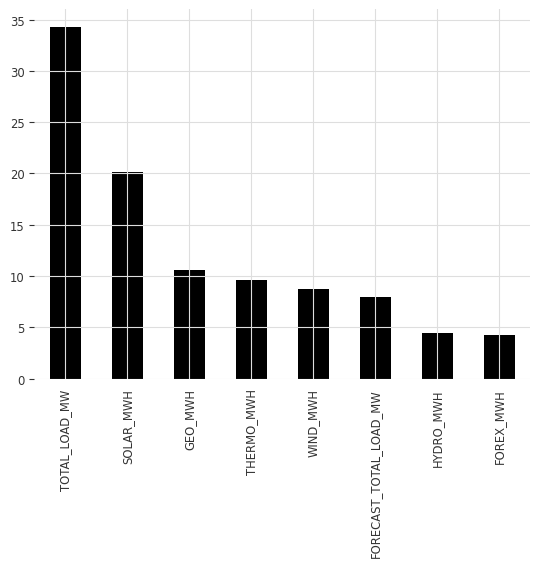

In [103]:
feature_importance = pd.DataFrame(data={"importance": 100*selector.feature_importances_}, index=FEATURES)

# Plot importance scores:
# fig, ax = plt.subplots(figsize=[15,5])
feature_importance.importance.nlargest(15).plot(kind="bar")
# ax.bar([ii for ii in range(len(FEATURES))], to_show)
# plt.xticks([ii for ii in range(len(FEATURES))], FEATURES)
plt.show()

## TEST 1: Probabilistic forecasting IQN

In [104]:
import sys
print(sys.executable)

c:\Users\samueledelia\.conda\envs\myenv\python.exe


In [105]:
import warnings

import pandas as pd
import numpy as np

import torch.nn as nn
import torch.optim as optim

import shutil
from sklearn.preprocessing import MinMaxScaler

from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

from pytorch_lightning.callbacks.early_stopping import EarlyStopping

from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from darts.models import RNNModel, ExponentialSmoothing, BlockRNNModel
from darts.metrics import mape
from darts.utils.statistics import check_seasonality, plot_acf
import darts.utils.timeseries_generation as tg
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.missing_values import fill_missing_values
from darts.utils.likelihood_models import QuantileRegression

In [106]:
# Check for duplicate timestamps in the index
duplicates = df_nord.index.duplicated(keep=False)  # True for duplicates
duplicate_timestamps = df_nord[duplicates]

# Display duplicate timestamps
print(duplicate_timestamps)

                     SBIL_MWH  WIND_MWH  THERMO_MWH  SOLAR_MWH  HYDRO_MWH  \
ORAINI                                                                      
2019-03-31 00:00:00    78.459     295.0      3590.0        0.0      532.5   
2019-03-31 00:00:00   181.921     295.0      3590.0        0.0      532.5   
2019-03-31 00:15:00   100.132     295.0      3590.0        0.0      532.5   
2019-03-31 00:15:00   104.462     295.0      3590.0        0.0      532.5   
2019-03-31 00:30:00   156.216     295.0      3590.0        0.0      532.5   
2019-03-31 00:30:00   133.717     295.0      3590.0        0.0      532.5   
2019-03-31 00:45:00   133.798     295.0      3590.0        0.0      532.5   
2019-03-31 00:45:00   -34.008     295.0      3590.0        0.0      532.5   
2019-10-27 02:00:00     6.815     197.5      2950.0        0.0      737.5   
2019-10-27 02:00:00    62.855     197.5      2950.0        0.0      737.5   
2019-10-27 02:15:00    30.342     197.5      2950.0        0.0      737.5   

In [107]:
# Remove duplicates by keeping the first occurrence
df_nord_unique = df_nord[~df_nord.index.duplicated(keep='first')]

In [108]:
# Convert the DataFrame to a Darts TimeSeries using the index as the time column
series = TimeSeries.from_dataframe(df_nord_unique, value_cols=['SBIL_MWH'],freq = '15min')

# Fill missing values using the TimeSeries object
series_filled = fill_missing_values(series)

# Optionally scale the data
scaler = Scaler()
series_scaled = scaler.fit_transform(series_filled)

In [109]:
series

<TimeSeries (DataArray) (ORAINI: 203229, component: 1, sample: 1)> Size: 2MB
array([[[-47.312]],

       [[-30.343]],

       [[-20.311]],

       ...,

       [[102.736]],

       [[202.606]],

       [[-41.526]]])
Coordinates:
  * ORAINI     (ORAINI) datetime64[ns] 2MB 2019-01-01 ... 2024-10-17T23:00:00
  * component  (component) object 8B 'SBIL_MWH'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [110]:
# Split the series into train and test sets
train, test = series_scaled.split_before(0.8)  # 80% train, 20% test

In [111]:
from darts.models import RNNModel

# Initialize the model
model = RNNModel(input_chunk_length=24,  # Number of previous time steps to use as input
                  output_chunk_length=1,  # How many time steps to predict
                  n_epochs=10,           # Number of training epochs
                  random_state=42)

# Fit the model on the training data
model.fit(train)

ignoring user defined `output_chunk_length`. RNNModel uses a fixed `output_chunk_length=1`.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | rnn             | RNN              | 700    | train
6 | V               | Linear           | 26     | train
-------------------------------------------------------------
726       Trainable params
0         Non-trainable params
726       Total params
0.003     Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Epoch 2:  33%|███▎      | 1673/5080 [00:30<01:02, 54.94it/s, train_loss=0.000672]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

In [ ]:
# Make predictions
forecast = model.predict(n=len(test))  # Forecast for the length of the test set

# Inverse scale the forecast to original scale if necessary
forecast_inv_scaled = scaler.inverse_transform(forecast)

In [ ]:
from darts.metrics import mape

# Calculate MAPE
mape_value = mape(test, forecast_inv_scaled)
print(f'MAPE: {mape_value}')

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual vs predicted values
plt.figure(figsize=(14, 7))
series.plot(label='Actual', lw=2)
forecast_inv_scaled.plot(label='Forecast', lw=2)
plt.title('Actual vs Forecast')
plt.legend()
plt.show()